# Locally Weighted Regression Algorithm

## Objective
Implement the non-parametric Locally Weighted Regression algorithm to fit data points and visualize the results.

## How Locally Weighted Regression Works
1. **Basic Idea**: Unlike standard linear regression that uses all data points equally to find a global best fit, LWR gives nearby points more weight than distant points when fitting a model at a specific point.

2. **Key Components**:
   - **Weight Function**: Typically a Gaussian kernel that assigns weights based on distance
   - **Bandwidth Parameter (τ)**: Controls how quickly weight decreases with distance
   
3. **Algorithm Steps**:
   - For each prediction point x:
     - Calculate weights for all training points based on distance from x
     - Solve weighted least squares problem to find local parameters
     - Use local parameters to make prediction at x

4. **Mathematical Expression**:
   - Weight calculation: w(i) = exp(-||x - x(i)||²/(2τ²))
   - Parameter estimation: θ = (X^T W X)^(-1) X^T W y
   - Prediction: f(x) = x^T θ

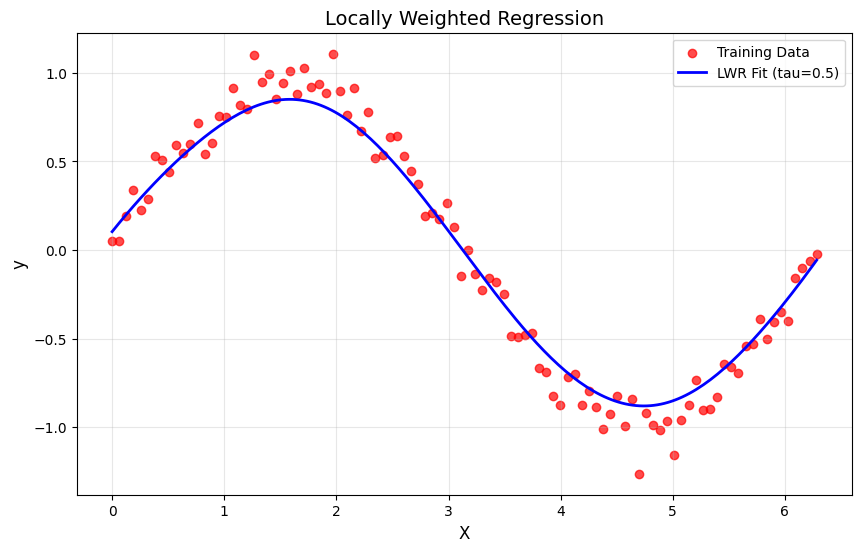

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Gaussian kernel weight function
def gaussian_kernel(x, xi, tau):
    return np.exp(-np.sum((x - xi) ** 2) / (2 * tau ** 2))

# Locally Weighted Regression function
def locally_weighted_regression(x, X, y, tau):
    m = X.shape[0]  # Number of training examples
    # Calculate weights for all training examples
    weights = np.array([gaussian_kernel(x, X[i], tau) for i in range(m)])
    # Create diagonal weight matrix
    W = np.diag(weights)
    # Calculate parameter theta using weighted normal equation
    X_transpose_W = X.T @ W
    theta = np.linalg.inv(X_transpose_W @ X) @ X_transpose_W @ y
    # Return prediction
    return x @ theta

# Generate synthetic data with noise
np.random.seed(42)
X = np.linspace(0, 2 * np.pi, 100)
y = np.sin(X) + 0.1 * np.random.randn(100)
X_bias = np.c_[np.ones(X.shape), X]  # Add bias term

# Create test points for prediction
x_test = np.linspace(0, 2 * np.pi, 200)
x_test_bias = np.c_[np.ones(x_test.shape), x_test]
tau = 0.5  # Bandwidth parameter
# Make predictions for all test points
y_pred = np.array([locally_weighted_regression(xi, X_bias, y, tau) for xi in x_test_bias])

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='red', label='Training Data', alpha=0.7)
plt.plot(x_test, y_pred, color='blue', label=f'LWR Fit (tau={tau})', linewidth=2)
plt.xlabel('X', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Locally Weighted Regression', fontsize=14)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.show()

## Effect of Bandwidth Parameter (τ)

The bandwidth parameter τ controls the smoothness of the fit:
- **Small τ**: More sensitive to local variations, potentially overfitting
- **Large τ**: Smoother fit, approaching global linear regression

Let's visualize different values of τ to understand its impact:

In [ ]:
# Compare different bandwidth (tau) values
plt.figure(figsize=(12, 8))

# True function without noise for comparison
plt.plot(x_test, np.sin(x_test), 'k--', label='True Function (sin(x))', alpha=0.7)

# Plot data points
plt.scatter(X, y, color='red', label='Training Data', alpha=0.5, s=30)

# Try different tau values
tau_values = [0.1, 0.5, 1.0, 2.0]
colors = ['blue', 'green', 'purple', 'orange']

for tau, color in zip(tau_values, colors):
    y_pred = np.array([locally_weighted_regression(xi, X_bias, y, tau) for xi in x_test_bias])
    plt.plot(x_test, y_pred, color=color, label=f'τ = {tau}', linewidth=2)

plt.xlabel('X', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Effect of Bandwidth Parameter (τ) on LWR Fit', fontsize=14)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.show()

## Comparison with Standard Linear Regression

Let's compare locally weighted regression with standard linear regression to understand the difference:

In [ ]:
# Compare with standard linear regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

# Reshape X for sklearn
X_reshaped = X.reshape(-1, 1)
x_test_reshaped = x_test.reshape(-1, 1)

# Fit linear regression model
lr_model = LinearRegression()
lr_model.fit(X_reshaped, y)
y_lr_pred = lr_model.predict(x_test_reshaped)

# Get LWR predictions (with optimal tau)
tau_optimal = 0.5
y_lwr_pred = np.array([locally_weighted_regression(xi, X_bias, y, tau_optimal) for xi in x_test_bias])

# Plot comparison
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='red', label='Training Data', alpha=0.7)
plt.plot(x_test, np.sin(x_test), 'k--', label='True Function (sin(x))', alpha=0.7)
plt.plot(x_test, y_lr_pred, color='green', label='Linear Regression', linewidth=2)
plt.plot(x_test, y_lwr_pred, color='blue', label=f'LWR (τ = {tau_optimal})', linewidth=2)

plt.xlabel('X', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Comparison: Linear Regression vs Locally Weighted Regression', fontsize=14)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.show()

# Calculate and print error metrics
# For this, we need predictions on training points
y_lr_train = lr_model.predict(X_reshaped)
y_lwr_train = np.array([locally_weighted_regression(xi, X_bias, y, tau_optimal) for xi in X_bias])

print(f"Linear Regression MSE: {metrics.mean_squared_error(y, y_lr_train):.4f}")
print(f"LWR MSE (τ = {tau_optimal}): {metrics.mean_squared_error(y, y_lwr_train):.4f}")

## Conclusion and Key Takeaways

**About Locally Weighted Regression:**

1. **Non-parametric Method**: LWR doesn't assume a global function form, making it more flexible

2. **Adapts to Local Structure**: By weighting nearby points more heavily, it captures local patterns

3. **Bandwidth Selection**: The bandwidth parameter τ is crucial:
   - Too small: Overfitting, high variance
   - Too large: Underfitting, high bias

4. **Computational Cost**: More expensive than global methods as we need to compute a separate model for each prediction point

5. **No Training Phase**: Unlike other models, LWR keeps all training data and performs computation at prediction time

LWR is particularly useful for datasets where the relationship varies across the input space and cannot be captured by a simple global model.

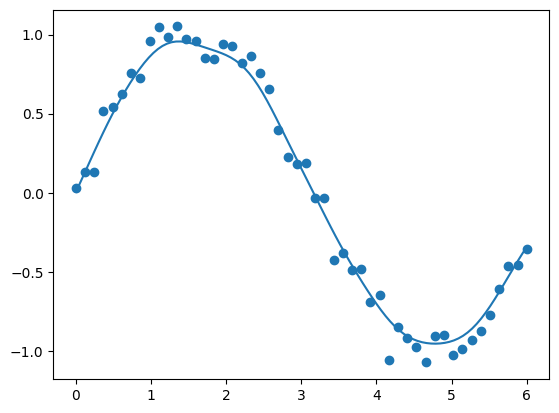

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def weight(x, xi, tau):
    return np.exp(-((x - xi)**2) / (2 * tau**2))

def predict(x, X, y, tau):
    w = [weight(x, xi, tau) for xi in X]
    W = np.diag(w)
    X_ = np.c_[np.ones(len(X)), X]
    x_ = np.array([1, x])
    theta = np.linalg.pinv(X_.T @ W @ X_) @ X_.T @ W @ y
    return x_ @ theta

X = np.linspace(0, 6, 50)
y = np.sin(X) + 0.1 * np.random.randn(50)
X_test = np.linspace(0, 6, 100)
y_pred = [predict(x, X, y, 0.3) for x in X_test]

plt.scatter(X, y)
plt.plot(X_test, y_pred)
plt.show()
